In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


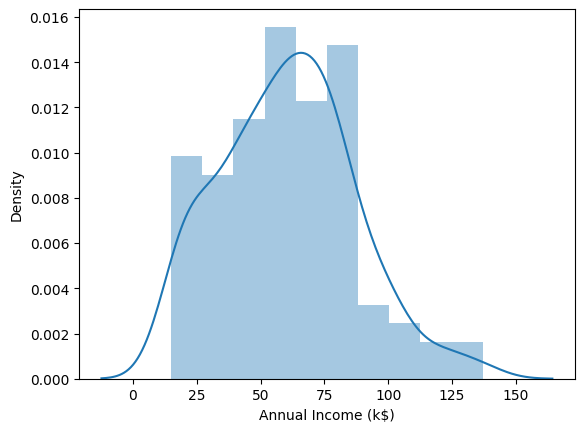

In [ ]:
sns.distplot(df["Annual Income (k$)"]);

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

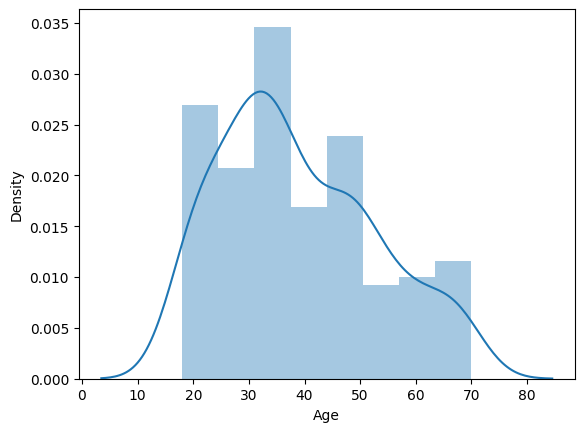

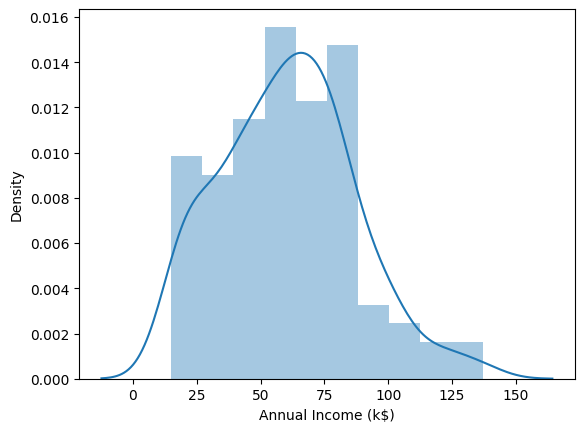

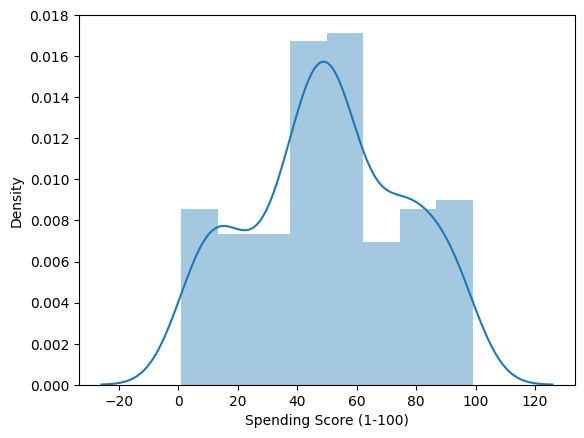

In [ ]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

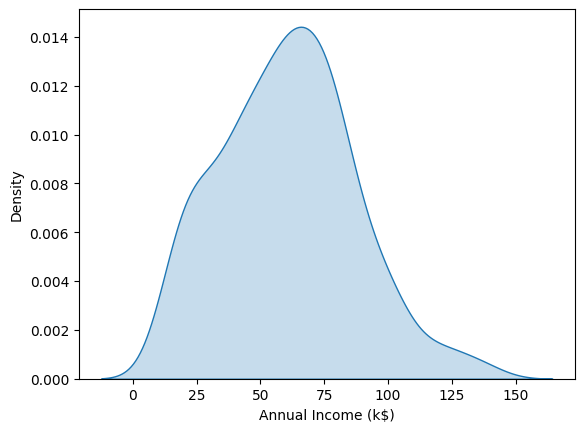

In [ ]:
sns.kdeplot(df['Annual Income (k$)'],shade=True);

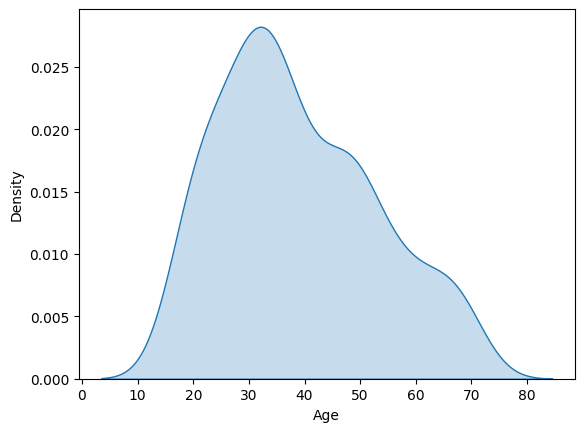

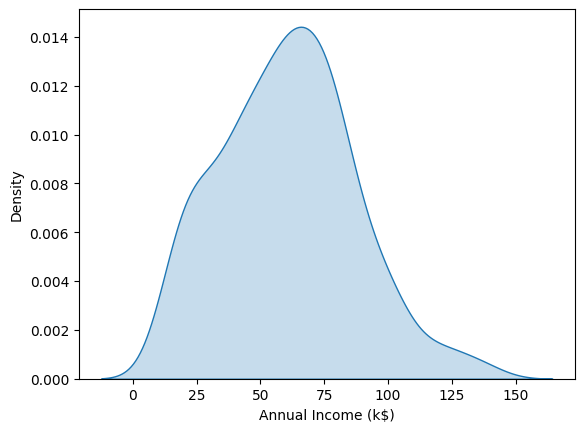

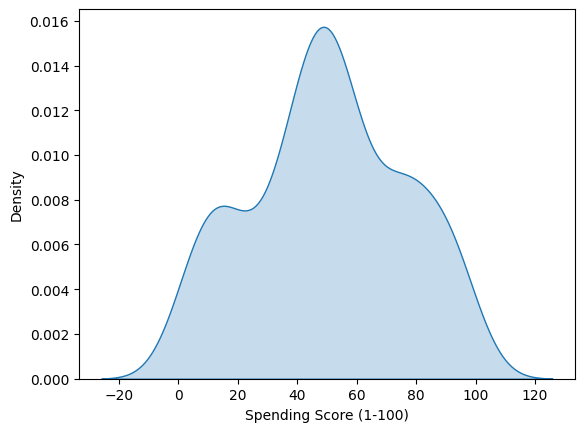

In [ ]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(df[i],shade=True);


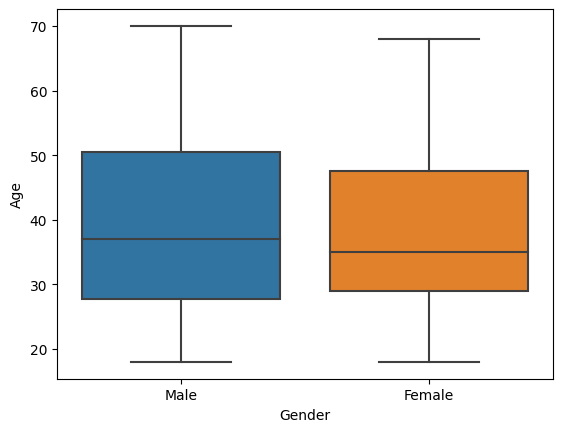

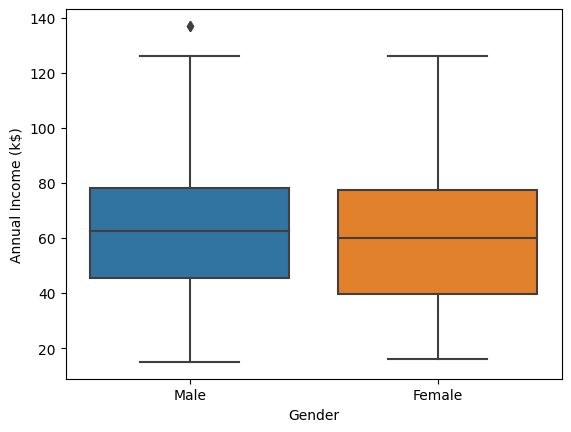

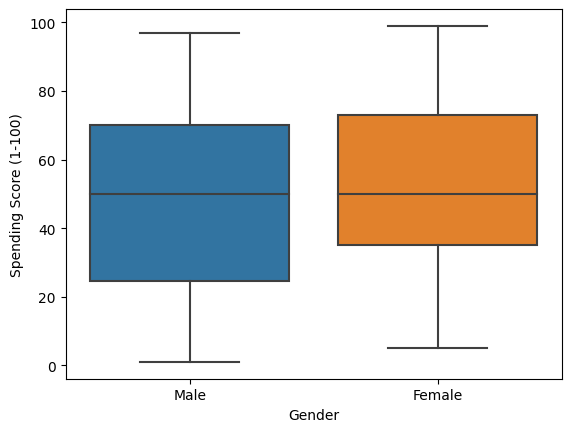

In [ ]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender', y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

Bivariate Analysis

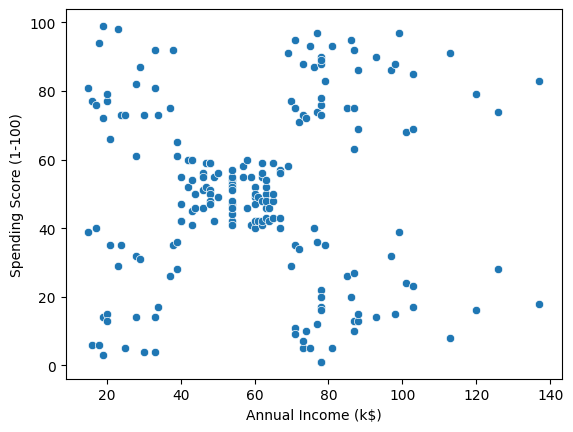

In [ ]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)');

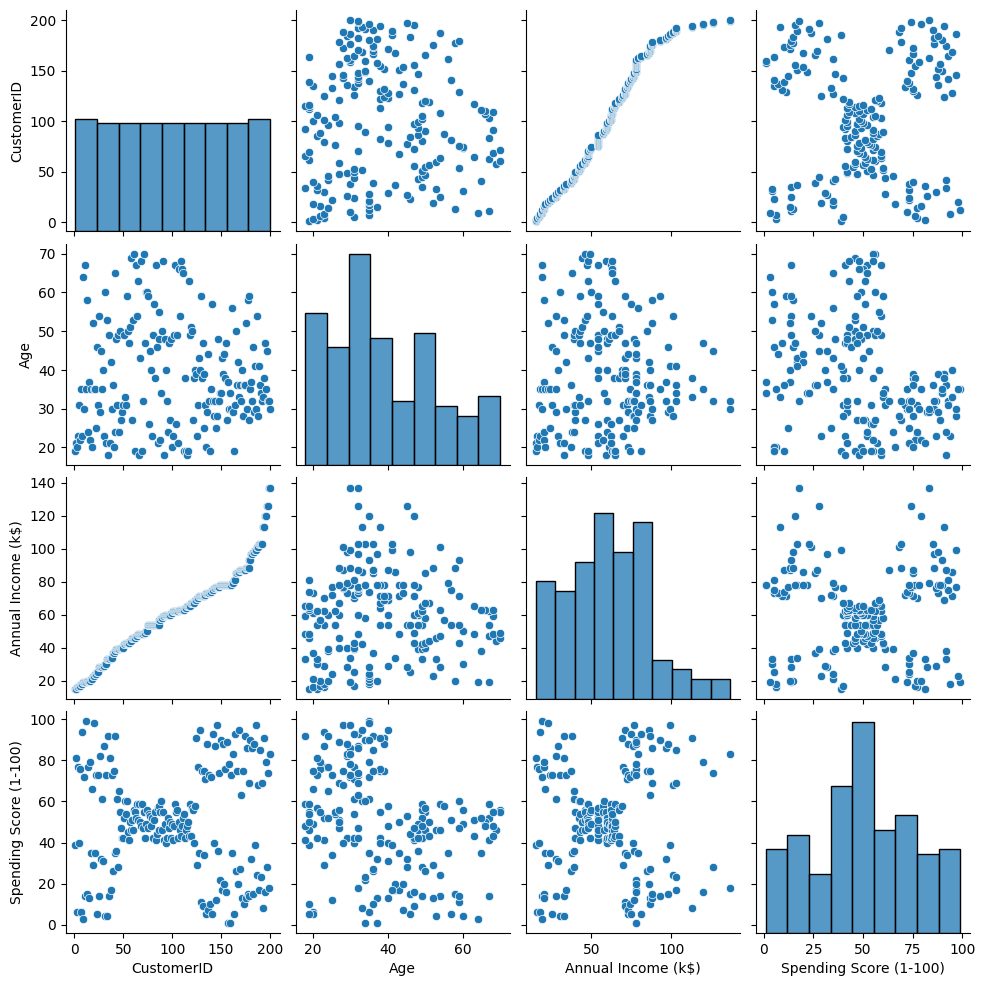

In [ ]:
sns.pairplot(df);

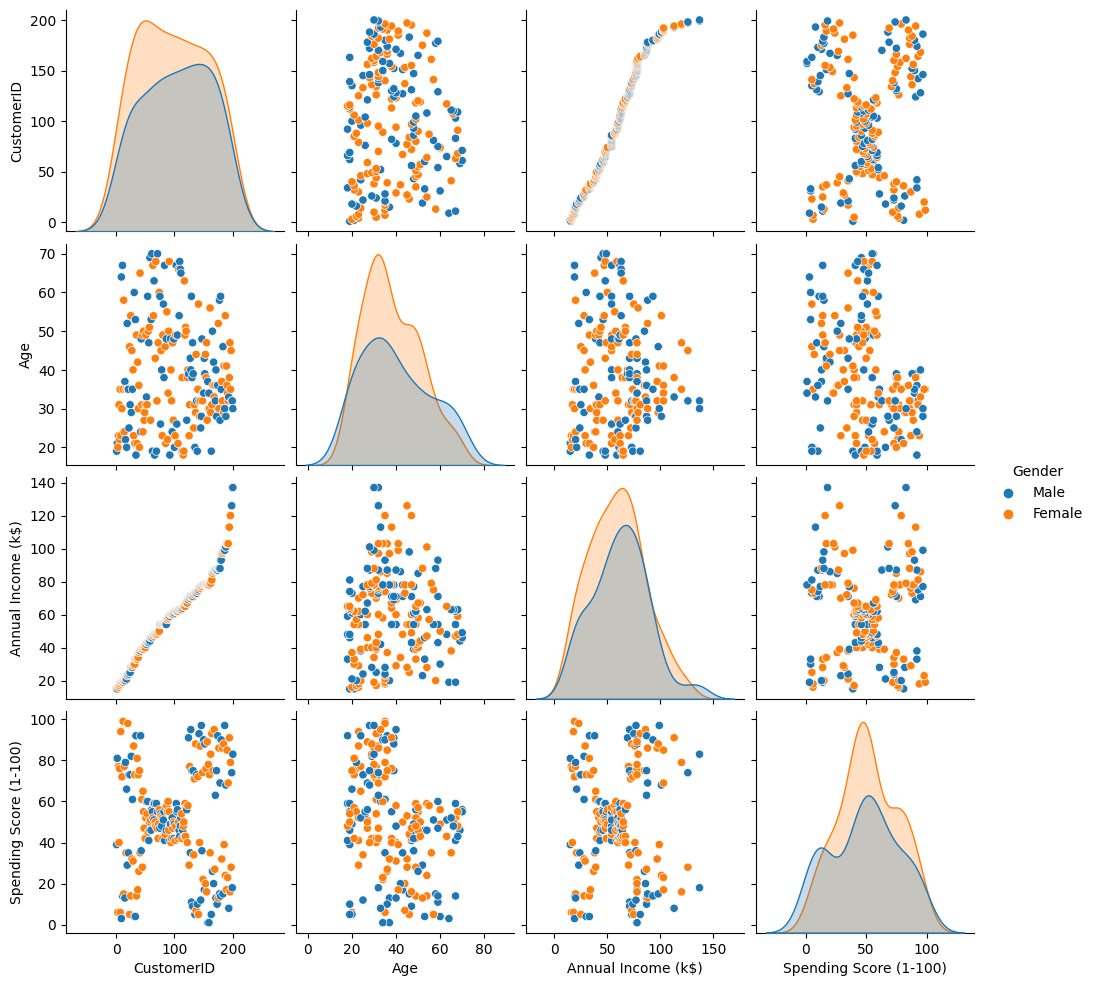

In [ ]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


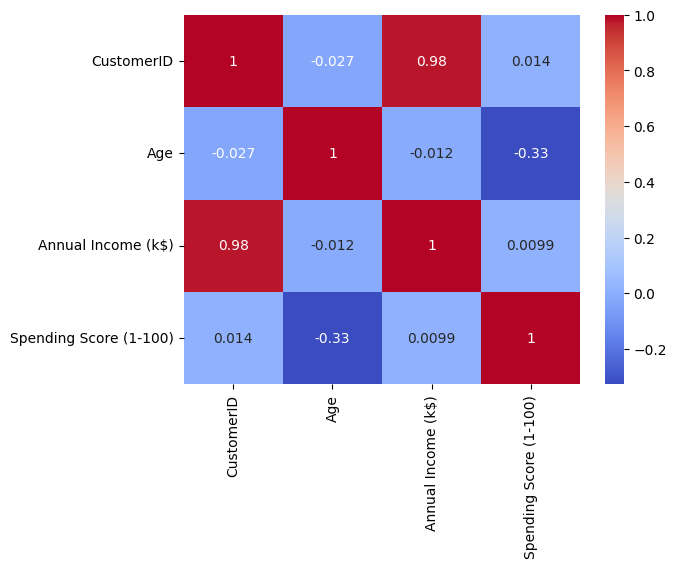

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

Clustering-Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=6)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [ ]:
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [ ]:
df['Income Cluster'].value_counts()

2    48
0    42
5    42
4    32
1    28
3     8
Name: Income Cluster, dtype: int64

In [ ]:
clustering1.inertia_

5050.9047619047615

In [ ]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3949.275613275612,
 2827.308424908427,
 2173.2874458874467,
 1748.8686813186823]

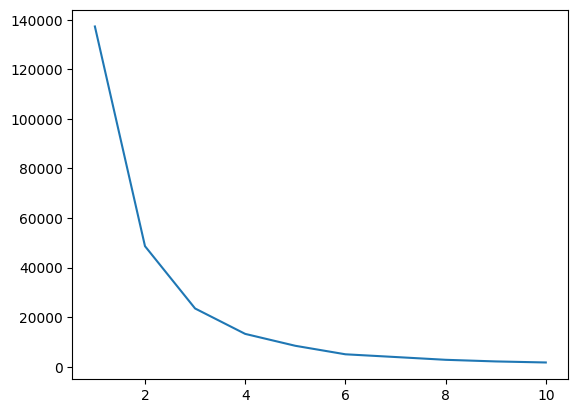

In [ ]:
plt.plot(range(1,11),inertia_scores)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,38.214286,93.000000,50.928571
2,41.604167,60.083333,49.041667
3,36.500000,124.000000,49.625000
4,34.906250,22.000000,49.656250
5,35.428571,75.095238,51.095238


Bivariate clustering

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,4,2


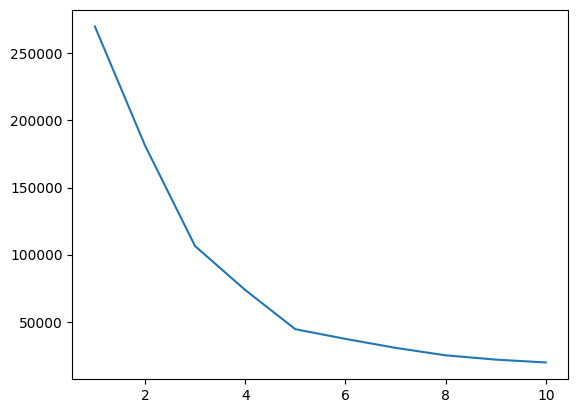

In [ ]:
inertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [ ]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

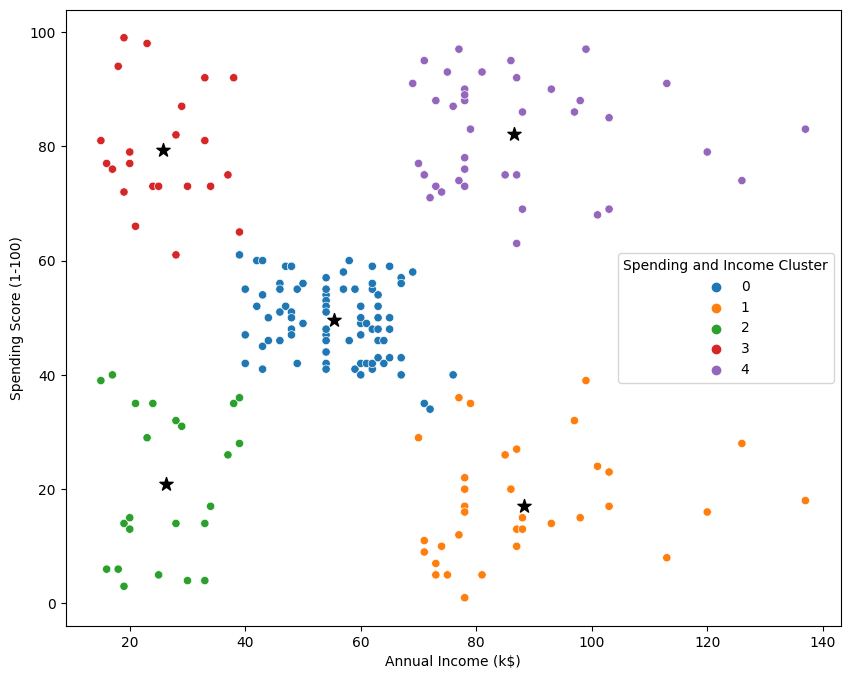

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [71]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [72]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


Multivariate Clustering

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scale=StandardScaler()

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,4,2


In [76]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,4,2,1
1,2,21,15,81,4,3,1
2,3,20,16,6,4,2,0
3,4,23,16,77,4,3,0
4,5,31,17,40,4,2,0


In [77]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [78]:
dff=dff[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [79]:
dff=scale.fit_transform(dff)

In [82]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [84]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


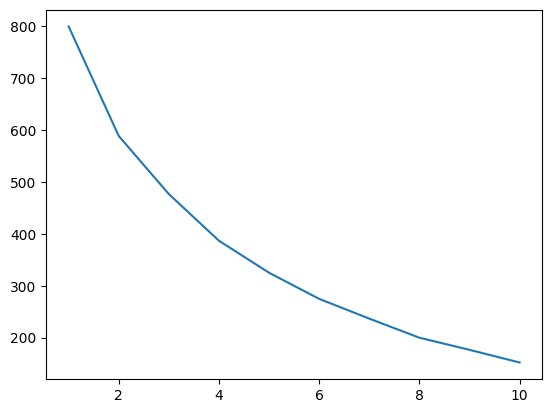

In [85]:
inertia_scores3=[]
for i in range(1,11):
  kmeans3=KMeans(n_clusters=i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)